In [21]:
import tensorflow as tf
from tensorflow.keras import models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

samsung_df = pd.read_csv('005930.KS.csv',encoding='utf-8-sig')
samsung_df.dropna(inplace=True)
samsung_df.reset_index(inplace=True,drop=True)
print(samsung_df.head(5))
'''
samsung_df.hist()
plt.show()
plt.figure(figsize=(7,4))
plt.title('Samsung elec stock price')
plt.xlabel('price')
plt.ylabel('period')
plt.grid()
plt.plot(samsung_df['Adj Close'], label='Adj Close',color='b')
plt.legend(loc='best')
plt.show()
'''



         Date     Open     High      Low    Close     Adj Close      Volume
0  2010-01-04  16060.0  16180.0  16000.0  16180.0  13134.010742  11950800.0
1  2010-01-05  16520.0  16580.0  16300.0  16440.0  13345.065430  27925850.0
2  2010-01-06  16580.0  16820.0  16520.0  16820.0  13653.530273  22948850.0
3  2010-01-07  16820.0  16820.0  16260.0  16260.0  13198.952148  22107950.0
4  2010-01-08  16400.0  16420.0  16120.0  16420.0  13328.830078  14777550.0


"\nsamsung_df.hist()\nplt.show()\nplt.figure(figsize=(7,4))\nplt.title('Samsung elec stock price')\nplt.xlabel('price')\nplt.ylabel('period')\nplt.grid()\nplt.plot(samsung_df['Adj Close'], label='Adj Close',color='b')\nplt.legend(loc='best')\nplt.show()\n"

In [22]:
#samsung_df['Volume'] = samsung_df['Volume'].replace(0,np.nan)
print(samsung_df.isna().sum())

samsung_df['3MA'] = 0
samsung_df['5MA'] = 0


for i in range(2,len(samsung_df),1):
    
    samsung_df.loc[i,('3MA')] = samsung_df.loc[i-2:i,('Adj Close')].mean()

for i in range(4,len(samsung_df),1):
    samsung_df.loc[i,('5MA')] = samsung_df.loc[i-4:i,('Adj Close')].mean()

samsung_df

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2010-01-04,16060.0,16180.0,16000.0,16180.0,13134.010742,11950800.0,0.000000,0.000000
1,2010-01-05,16520.0,16580.0,16300.0,16440.0,13345.065430,27925850.0,0.000000,0.000000
2,2010-01-06,16580.0,16820.0,16520.0,16820.0,13653.530273,22948850.0,13377.535482,0.000000
3,2010-01-07,16820.0,16820.0,16260.0,16260.0,13198.952148,22107950.0,13399.182617,0.000000
4,2010-01-08,16400.0,16420.0,16120.0,16420.0,13328.830078,14777550.0,13393.770833,13332.077734
...,...,...,...,...,...,...,...,...,...
2831,2021-07-01,80500.0,80600.0,80000.0,80100.0,80100.000000,13382882.0,80600.000000,81060.000000
2832,2021-07-02,80000.0,80400.0,79900.0,80000.0,80000.000000,8753097.0,80266.666667,80740.000000
2833,2021-07-05,80100.0,80800.0,80000.0,80400.0,80400.000000,8330969.0,80166.666667,80440.000000
2834,2021-07-06,80600.0,81200.0,80500.0,81200.0,81200.000000,12131651.0,80533.333333,80480.000000


In [24]:
scaler = MinMaxScaler()
scale_cols = ['Open','High','Low','Close','Adj Close','3MA','5MA','Volume']

scaled_df= scaler.fit_transform(samsung_df[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.031062  0.027034  0.033658  0.033333   0.024657  0.000000  0.000000   
1     0.037066  0.031861  0.037602  0.036693   0.027314  0.000000  0.000000   
2     0.037849  0.034757  0.040494  0.041602   0.031198  0.148584  0.000000   
3     0.040981  0.034757  0.037076  0.034367   0.025474  0.148825  0.000000   
4     0.035500  0.029930  0.035235  0.036434   0.027109  0.148765  0.148859   
...        ...       ...       ...       ...        ...       ...       ...   
2831  0.872096  0.804490  0.875099  0.859173   0.867827  0.895225  0.905071   
2832  0.865570  0.802076  0.873784  0.857881   0.866568  0.891522  0.901498   
2833  0.866875  0.806903  0.875099  0.863049   0.871604  0.890412  0.898149   
2834  0.873401  0.811731  0.881672  0.873385   0.881677  0.894484  0.898595   
2835  0.881232  0.812937  0.879043  0.868217   0.876641  0.897446  0.898819   

        Volume  
0     0.132336  
1     0.309235  


In [25]:
sam_feat_cols = ['3MA','5MA','Adj Close']
label_cols = ['Adj Close']

label_df = pd.DataFrame(scaled_df,columns=label_cols)
feature_df = pd.DataFrame(scaled_df,columns=sam_feat_cols)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

In [26]:
# 입력 파라미터 featurn, label -> numpy type

def make_sequence_dataset(feature,label,window_size):
    
    feature_list = []
    label_list = []
    
    for i in range(len(feature) - window_size):
        
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list) , np.array(label_list)

In [27]:
window_size = 40
X,Y = make_sequence_dataset(feature_np,label_np,window_size)

print(X.shape, Y.shape)

(2796, 40, 3) (2796, 1)


In [28]:
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(2596, 40, 3) (2596, 1)
(200, 40, 3) (200, 1)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
print(x_train[0])
print(x_train[0].shape)

model = Sequential()

model.add(LSTM(128,
              activation='tanh',
              input_shape = x_train[0].shape))

model.add(Dense(1,activation='linear'))

model.summary()


[[0.         0.         0.02465651]
 [0.         0.         0.0273139 ]
 [0.14858439 0.         0.03119779]
 [0.14882482 0.         0.02547418]
 [0.14876471 0.14885862 0.02710948]
 [0.14612    0.14842357 0.02220356]
 [0.14587956 0.14795227 0.02465651]
 [0.144437   0.14635709 0.02220356]
 [0.14624021 0.14686465 0.02833597]
 [0.14822374 0.14762598 0.03140217]
 [0.15098866 0.14929366 0.03160658]
 [0.15074823 0.14980122 0.02751831]
 [0.15026737 0.15114261 0.02976685]
 [0.15068812 0.15197645 0.03303748]
 [0.15080833 0.15136013 0.02792713]
 [0.15128919 0.15132388 0.03140217]
 [0.14918545 0.15103385 0.025883  ]
 [0.14768278 0.14980122 0.02281681]
 [0.14563914 0.14827855 0.0244521 ]
 [0.14377583 0.14679215 0.0195462 ]
 [0.14239337 0.14443564 0.01811531]
 [0.14022954 0.14287673 0.01709325]
 [0.13980879 0.14204289 0.01811531]
 [0.13974868 0.14088278 0.0179109 ]
 [0.13842633 0.13965014 0.01259614]
 [0.13668323 0.13859878 0.01218731]
 [0.13578162 0.13819998 0.01484468]
 [0.13608215 0.13740239 0.01

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse',optimizer='adam',metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss',patience=5)

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
163/163 [==============================] - 3s 14ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 9.9214e-04 - val_mse: 9.9214e-04
Epoch 2/100
163/163 [==============================] - 2s 13ms/step - loss: 1.6352e-04 - mse: 1.6352e-04 - val_loss: 7.9743e-04 - val_mse: 7.9743e-04
Epoch 3/100
163/163 [==============================] - 2s 14ms/step - loss: 1.6740e-04 - mse: 1.6740e-04 - val_loss: 8.6625e-04 - val_mse: 8.6625e-04
Epoch 4/100
163/163 [==============================] - 2s 13ms/step - loss: 1.6180e-04 - mse: 1.6180e-04 - val_loss: 7.2728e-04 - val_mse: 7.2728e-04
Epoch 5/100
163/163 [==============================] - 2s 13ms/step - loss: 1.4341e-04 - mse: 1.4341e-04 - val_loss: 5.8661e-04 - val_mse: 5.8661e-04
Epoch 6/100
163/163 [==============================] - 2s 13ms/step - loss: 1.4302e-04 - mse: 1.4302e-04 - val_loss: 5.4156e-04 - val_mse: 5.4156e-04
Epoch 7/100
163/163 [==============================] - 2s 13ms/step - loss: 1.3431e-04 - mse: 1.3431e-04 - v

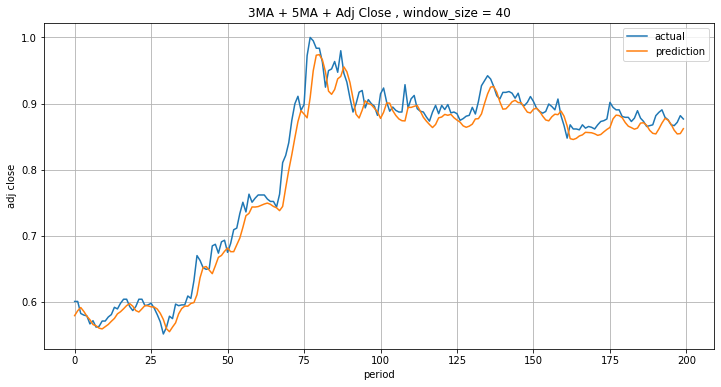

In [39]:
pred = model.predict(x_test)

plt.figure(figsize=(12,6))

plt.title('3MA + 5MA + Adj Close , window_size = 40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test,label='actual')
plt.plot(pred,label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()